## python 図の書き方

matplotlibにはたくさんのAPIがあり、各APIの下にモジュールがぶら下がっています。
https://matplotlib.org/api/index.html

今回は、一番基本の.pyplotを触っていきます。
https://matplotlib.org/api/pyplot_summary.html

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

今回はこのデータを使っていきます

In [38]:
year = [1980, 1985, 1990, 2000, 2010, 2018] #横軸

#Asan
weight = [3, 15, 25, 55, 62, 58] #縦軸

#Bsan
weightB = [4, 16, 30, 45, 52, 49] #縦軸

## Getting Started

一番シンプルな図示方法を試します

matplotlib.pyplot の plot() 関数を使用して、変数 year と weight を指定しました。そして、plt.show()で描画します。


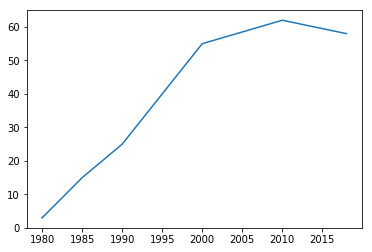

In [32]:
plt.plot(year, weight)
plt.show()

散布図の場合

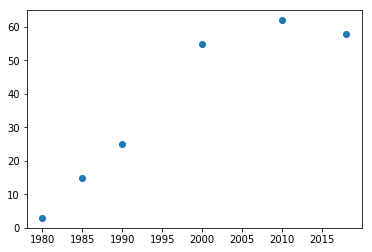

In [33]:
plt.scatter(year, weight)
plt.show()

## Axes

次はここに、グラフタイトル、ｘ軸ｙ軸のラベル、凡例、などを追加します

<img src="./images/figure_axes_axis_labeled.png">

基本的に、matplotで作成する図はこのように名付けられていて、各ラベル名はAxesオブジェクト（略してaxと名づけます）に要素を追加していく形で指定していきます。

まずさっきの例をAxに適応した形で書き直します

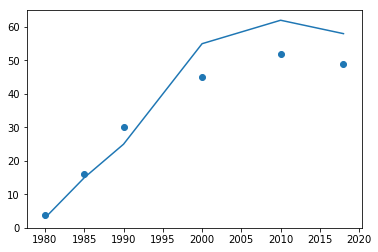

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)#1カラムの時は基本こう書く
ax.plot(year, weight)
ax.scatter(year, weightB)
plt.show()

色も変えられる

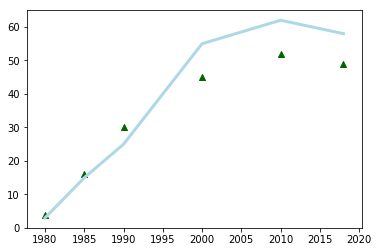

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)#1カラムの時は基本こう書く
ax.plot(year, weight, color='lightblue', linewidth=3)
ax.scatter(year, weightB, color='darkgreen', marker='^')
plt.show()

グラフタイトル、ｘ軸ｙ軸のラベル、凡例、など追加

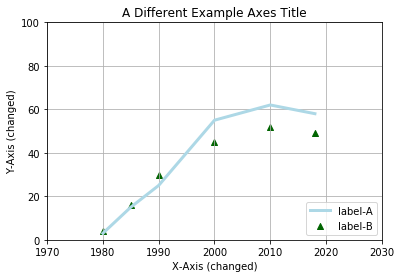

In [146]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(year, weight, color='lightblue', linewidth=3, label="label-A")
ax.scatter(year, weightB, color='darkgreen', marker='^', label="label-B")

ax.set_xlim([1970, 2030])
ax.set_ylim([0, 100])

ax.set_title('A Different Example Axes Title')
ax.set_ylabel('Y-Axis (changed)')
ax.set_xlabel('X-Axis (changed)')

plt.legend(loc='lower right')
plt.grid()
plt.show()

軸線系を追加

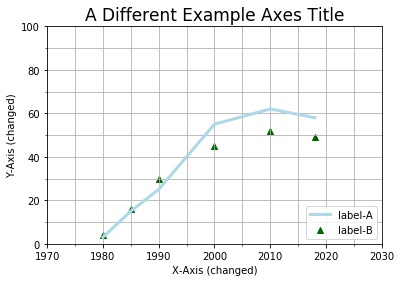

In [149]:
import matplotlib.ticker as tick # 目盛り操作に必要なライブラリを読み込みます

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(year, weight, color='lightblue', linewidth=3, label="label-A")
ax.scatter(year, weightB, color='darkgreen', marker='^', label="label-B")

ax.set_xlim([1970, 2030])
ax.set_ylim([0, 100])

ax.set_title('A Different Example Axes Title', fontsize = 17) #グラフのタイトルを設定
ax.set_ylabel('Y-Axis (changed)')
ax.set_xlabel('X-Axis (changed)')

plt.legend(loc='lower right')
#予備目盛りで刻む
plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(5)) #5刻み
plt.gca().yaxis.set_minor_locator(tick.MultipleLocator(10)) #10刻み
plt.grid(which='minor')

plt.show()

これでまあまあ基本は抑えた図

次は別々のサブプロットに表示してみます。
fig.add_subplotの数字の意味は、fig.add_subplot(行,列,場所)

https://teratail.com/questions/72586

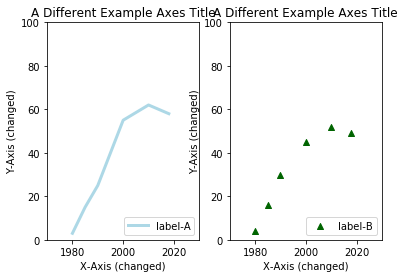

In [69]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(year, weight, color='lightblue', linewidth=3, label="label-A")
ax2.scatter(year, weightB, color='darkgreen', marker='^', label="label-B")

ax1.set_xlim([1970, 2030])
ax1.set_ylim([0, 100])

ax1.set_title('A Different Example Axes Title')
ax1.set_ylabel('Y-Axis (changed)')
ax1.set_xlabel('X-Axis (changed)')
ax1.legend(loc='lower right')

ax2.set_xlim([1970, 2030])
ax2.set_ylim([0, 100])

ax2.set_title('A Different Example Axes Title')
ax2.set_ylabel('Y-Axis (changed)')
ax2.set_xlabel('X-Axis (changed)')
ax2.legend(loc='lower right')

plt.show()

## Seaborn

上に書いてきたとおり、matplotlibっていろいろなことができるのですが、
設定にめちゃくちゃいろいろ書かないといけなかったりするので

もう少し簡単にかけるラッパーとしてシーボーンが生まれました。

このコマンドでインストールできるよ
pip install seaborn

In [71]:
import seaborn as sns

### ヒストグラム
- kdeは密度近似関数の描画のオプション　Falseなら密度関数を描画しないようにできる
- norm_hist=True でヒストグラムを正規化するように設定できる。
- binsはヒストグラムの本数

- rug下の方にrugplotを出すかどうか決める
- axlabel='label'でラベルをつけられる

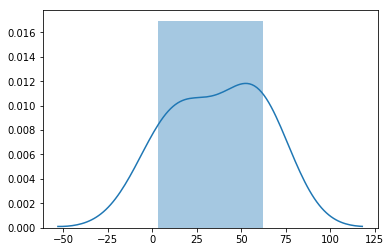

In [109]:
sns.distplot(weight)

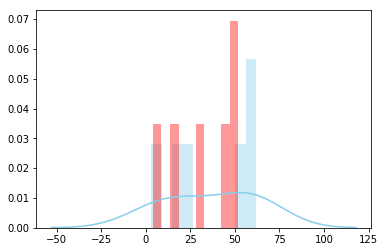

In [112]:
# Method 1: on the same Axis
sns.distplot(weight ,kde=True ,rug=False, color="skyblue", label="Asan",bins=10)
sns.distplot( weightB ,kde=False ,norm_hist=True, rug=False, color="red", label="Bsan" ,bins=10)

散布図を書くとこんな感じ。項目別に色のついた散布図がかける。
選択できるカラーパレットはこんな感じ

<img src="./images/color.png">

### 散布図

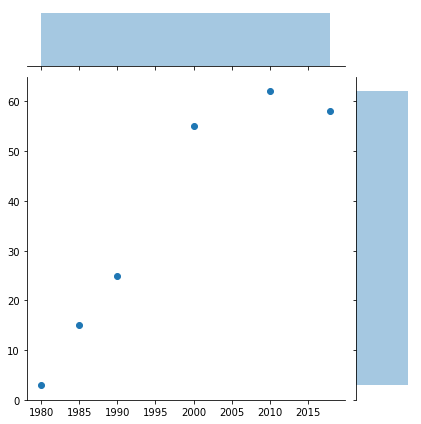

In [121]:
sns.jointplot(x=year, y=weight)

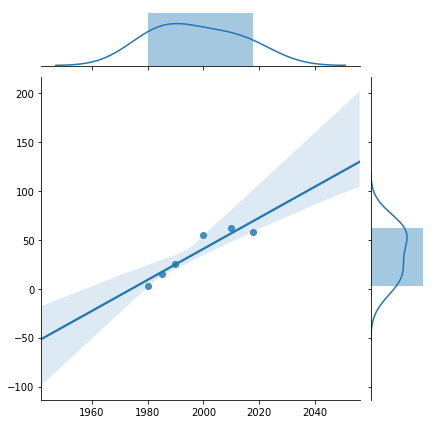

In [122]:
sns.jointplot(x=year, y=weight,kind="reg")

### サブプロット

https://own-search-and-study.xyz/2016/08/03/pandas%E3%81%AEplot%E3%81%AE%E5%85%A8%E5%BC%95%E6%95%B0%E3%82%92%E4%BD%BF%E3%81%84%E3%81%93%E3%81%AA%E3%81%99/

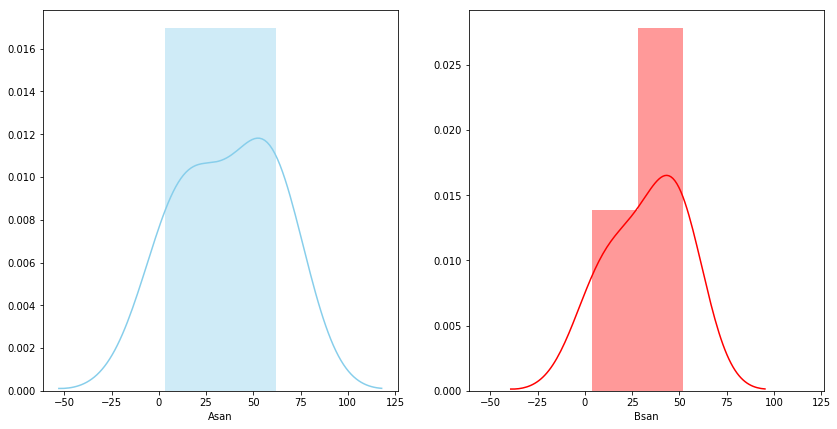

In [108]:
f, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=True)
sns.distplot(weight , color="skyblue", label="Asan", ax=axes[0],axlabel='Asan')
sns.distplot( weightB , color="red", label="Bsan", ax=axes[1],axlabel='Bsan')

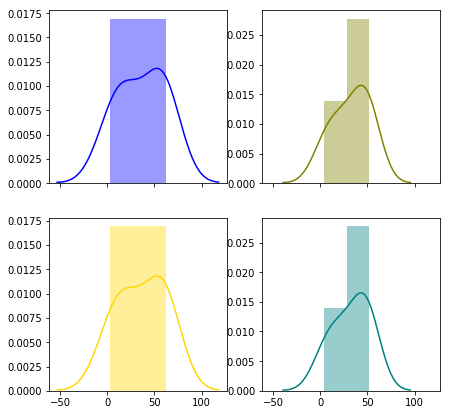

In [91]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( weight , color="blue", ax=axes[0, 0])
sns.distplot( weightB , color="olive", ax=axes[0, 1])
sns.distplot( weight, color="gold", ax=axes[1, 0])
sns.distplot( weightB , color="teal", ax=axes[1, 1])

### matplot と　seabornを組み合わせる

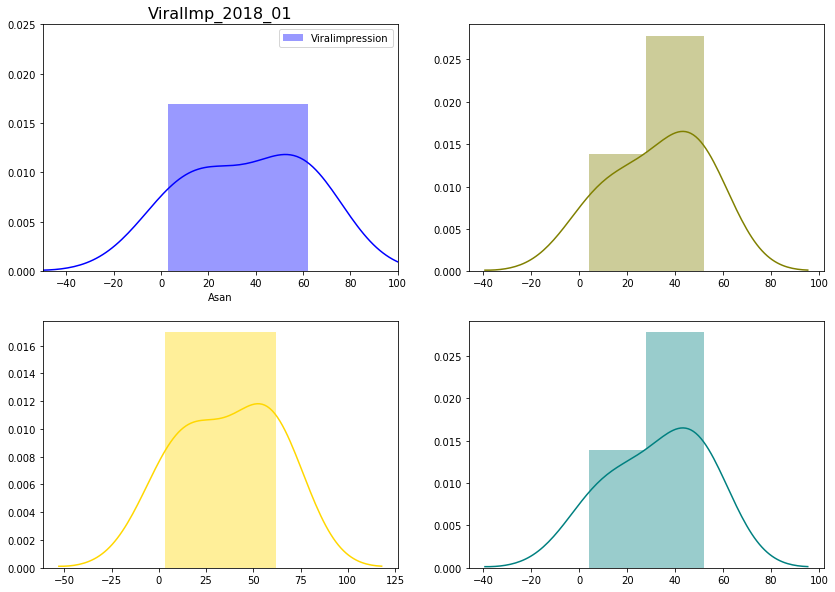

In [143]:
##ヒストグラム
fig = plt.figure(figsize=(14, 10))

fig.add_subplot(221)
x = weight
plt.xlim([-50,100])
plt.ylim([0,0.025])
plt.title("ViralImp_2018_01",fontsize=16)
sns.distplot(x , color="blue",axlabel='Asan', label="Viralimpression")
plt.legend(loc='upper right')

fig.add_subplot(222)
sns.distplot( weightB , color="olive")
fig.add_subplot(223)
sns.distplot( weight, color="gold")
fig.add_subplot(224)
sns.distplot( weightB , color="teal")

## pandas との連携


In [209]:
import pandas as pd
sns.set()

ここからはアイリスデータを使ってみます。データフレーム形式にします

In [210]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


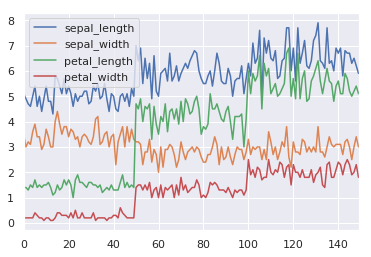

In [212]:
df.plot()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


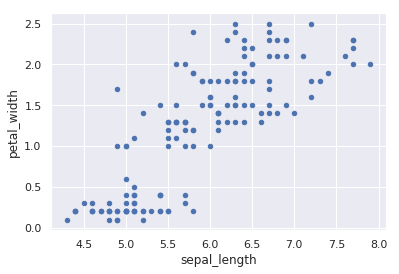

In [218]:
df.plot.scatter(x='sepal_length', y='petal_width')

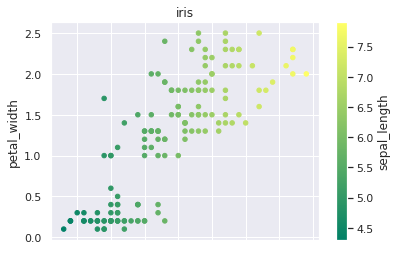

In [220]:
df.plot(
    kind="scatter",  # グラフの種類を指定
    x='sepal_length',             # x軸に対応する列の番号か列名
    y='petal_width',             # y軸に対応する列の番号か列名
    c="sepal_length",       # 点の色を指定する列の番号か列名
    cmap="summer",   # 色合いの指定
    title="iris"     # プロットのタイトル
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdce7b262b0>,
      dtype=object)

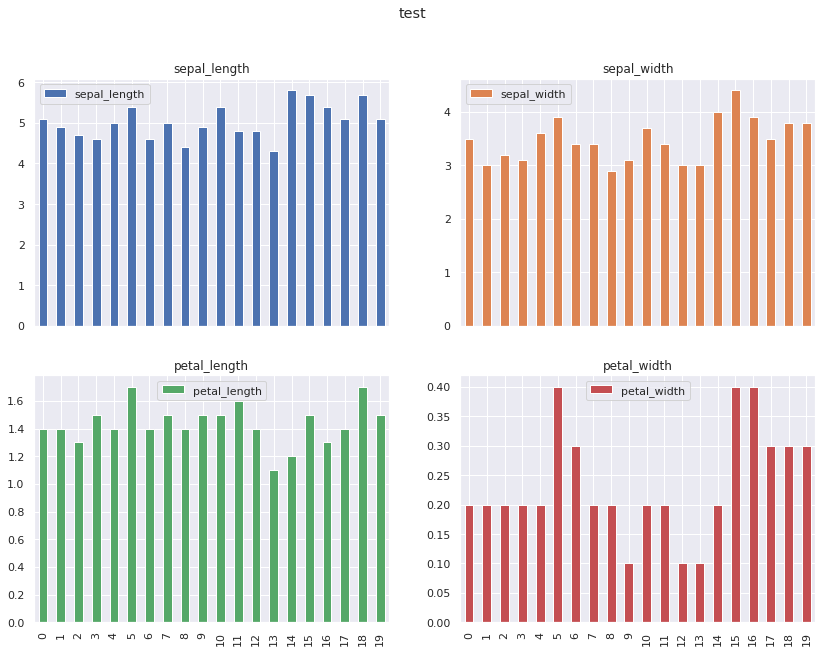

In [217]:
df[:20].plot(
    kind="bar",
    subplots=True,
    layout=(2,2),
    figsize=(14, 10),
    title='test') 


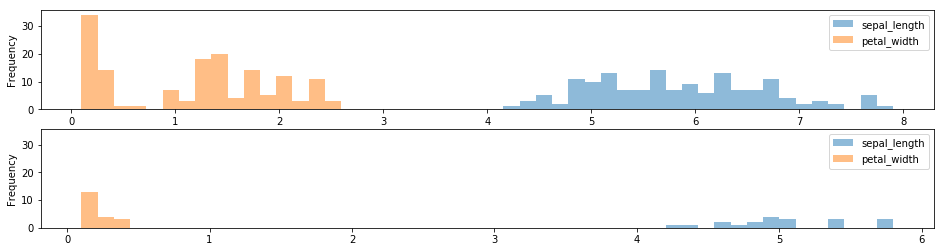

In [195]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharey=True)
df.plot( y=['sepal_length', 'petal_width'], bins=50, alpha=0.5, figsize=(16,4), kind='hist',ax=axes.flatten()[0])
df[0:20].plot( y=['sepal_length', 'petal_width'], bins=50, alpha=0.5, figsize=(16,4), kind='hist',ax=axes.flatten()[1])

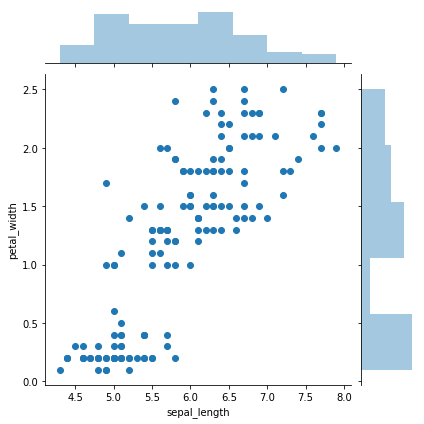

In [170]:
sns.jointplot(x='sepal_length', y='petal_width' ,data=df)

Text(0.5, 1.0, '普通の棒グラフ')

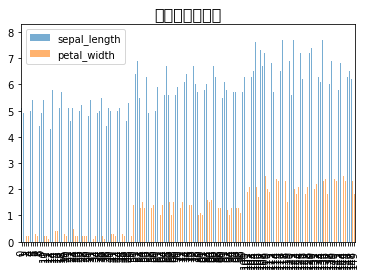

In [179]:
# X軸はインデックスを使用するので省略している
df.plot.bar(y = ['sepal_length', 'petal_width'], alpha=0.6)
plt.title(u'普通の棒グラフ', size=16)

Text(0.5, 1.0, '普通の棒グラフ')

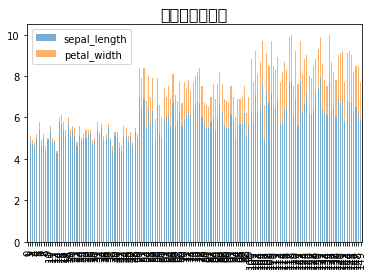

In [181]:
# X軸はインデックスを使用するので省略している
df.plot.bar(y = ['sepal_length', 'petal_width'], alpha=0.6, stacked=True)
plt.title(u'普通の棒グラフ', size=16)

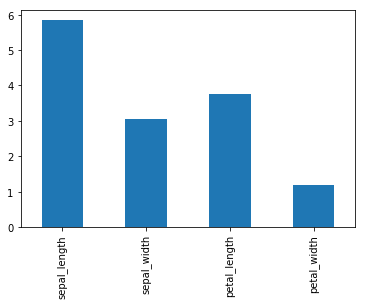

In [205]:
df.mean().plot(kind='bar', position=0.5)


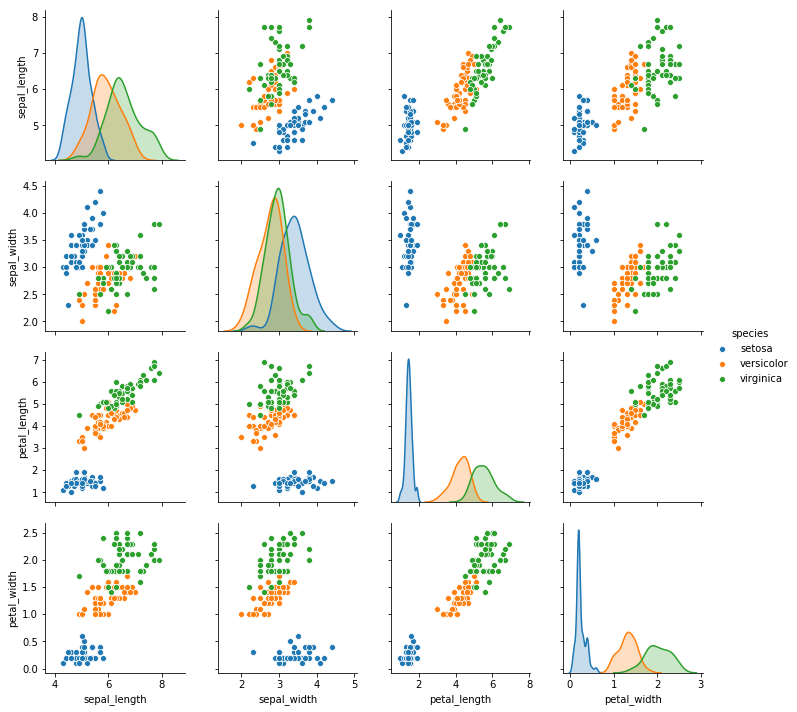

In [154]:
sns.pairplot(df, hue="species")

### その他

- ヒートマップ　https://qiita.com/hik0107/items/67ad4cfbc9e84032fc6b


### 謝辞

この資料を作成するにあたり、様々なサイトを参考にしましたが、特に参考にした２つサイトを上げておきます。
より詳しく記載があるので、参考にしてみてください。

https://github.com/matplotlib/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb

https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python